In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_validate, StratifiedKFold, train_test_split

from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
from sklearn.manifold import MDS, TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
scoring = {'accuracy': 'accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'F1-score': 'f1',
           'recall -': make_scorer(recall_score, pos_label=0),
           'precision -': make_scorer(precision_score, pos_label=0, zero_division=0),
           }

In [4]:
X = np.load('data/data_2/X.npy').astype(np.int8)
y = np.load('data/data_2/y.npy').astype(np.int8)

In [5]:
np.unique(y, return_counts=True)

(array([1, 2], dtype=int8), array([305, 923]))

In [6]:
y = np.where(y == 1, 0, 1)

In [7]:
np.unique(y)

array([0, 1])

In [33]:
clf = XGBClassifier(n_estimators=30,
                    use_label_encoder=False,
                    scale_pos_weight=0.2,
                    learning_rate=0.1,
                    min_child_weight=10,
                    max_depth=3)


scores = {'accuracy': [],
          'precision': [],
          'recall': [],
          'F1-score': [],
          'recall -': [],
          'precision -': [],
          }

X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  stratify=y,
                                                  random_state=42)

clf.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_val, y_val)],
        eval_metric='error',
        early_stopping_rounds=55,
        verbose=True)

print('___')

scores['accuracy'].append(accuracy_score(y_val, clf.predict(X_val)))
scores['precision'].append(precision_score(y_val, clf.predict(X_val)))
scores['recall'].append(recall_score(y_val, clf.predict(X_val)))
scores['F1-score'].append(f1_score(y_val, clf.predict(X_val)))
scores['recall -'].append(recall_score(y_val, clf.predict(X_val), pos_label=0))
scores['precision -'].append(precision_score(y_val, clf.predict(X_val), pos_label=0, zero_division=0))

scores

[0]	validation_0-error:0.75153	validation_1-error:0.75203
[1]	validation_0-error:0.75153	validation_1-error:0.75203
[2]	validation_0-error:0.75153	validation_1-error:0.75203
[3]	validation_0-error:0.75153	validation_1-error:0.75203
[4]	validation_0-error:0.75153	validation_1-error:0.75203
[5]	validation_0-error:0.75153	validation_1-error:0.75203
[6]	validation_0-error:0.75153	validation_1-error:0.75203
[7]	validation_0-error:0.75153	validation_1-error:0.75203
[8]	validation_0-error:0.75153	validation_1-error:0.75203
[9]	validation_0-error:0.75153	validation_1-error:0.75203
[10]	validation_0-error:0.75153	validation_1-error:0.75203
[11]	validation_0-error:0.75153	validation_1-error:0.75203
[12]	validation_0-error:0.75153	validation_1-error:0.75203
[13]	validation_0-error:0.75153	validation_1-error:0.75203


KeyboardInterrupt: 

In [37]:
pca = PCA(n_components=1000)
X_pca = pca.fit_transform(X)

In [48]:
X_TSNE = TSNE(n_components=100, n_iter=250, method='exact', verbose=20, n_jobs=-1).fit_transform(X_pca)

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 1000 / 1228
[t-SNE] Computed conditional probabilities for sample 1228 / 1228
[t-SNE] Mean sigma: 20.018971
[t-SNE] KL divergence after 250 iterations with early exaggeration: 236.177630
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000


(1228, 100)

In [53]:
X_TSNE.shape

(1228, 100)

In [66]:
clf = KNeighborsClassifier()
scores = cross_validate(clf, X, y, cv=5, scoring=scoring, n_jobs=-1)
mean_scores = pd.DataFrame(scores).apply(np.mean)
mean_scores[2:]

In [ ]:
embedding = MDS(n_components=2)

In [ ]:
X_MDS = embedding.fit_transform(X)

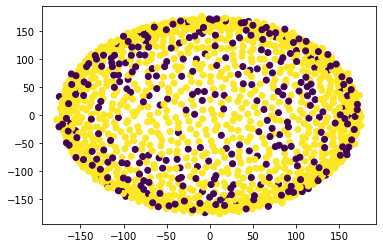

In [ ]:
plt.scatter(X_MDS[:,0], X_MDS[:,1], c=y);

In [ ]:
X_TSNE = TSNE().fit_transform(X)
X_TSNE.shape

(1228, 2)

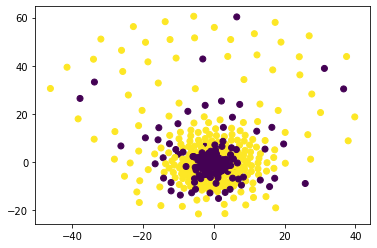

In [ ]:
plt.scatter(X_TSNE[:,0], X_TSNE[:,1], c=y);

In [ ]:
X_TSNE = TSNE(n_components=64, method='exact', n_iter=250, verbose=100, n_jobs=-1).fit_transform(X)
X_TSNE.shape

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 1000 / 1228
[t-SNE] Computed conditional probabilities for sample 1228 / 1228
[t-SNE] Mean sigma: 21.134376
[t-SNE] Iteration 50: error = 49.5744764, gradient norm = 0.0530863 (50 iterations in 22.841s)
[t-SNE] Iteration 100: error = 51.0131159, gradient norm = 0.0657304 (50 iterations in 30.787s)
[t-SNE] Iteration 150: error = 50.9811486, gradient norm = 0.0476354 (50 iterations in 24.547s)
[t-SNE] Iteration 200: error = 50.9558207, gradient norm = 0.0499528 (50 iterations in 19.081s)
[t-SNE] Iteration 250: error = 50.8649208, gradient norm = 0.0487015 (50 iterations in 22.938s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.864921
[t-SNE] KL divergence after 251 iterations: 17976931348623157081452742373170435679807056752584499659891747680315726078002853876058955863276687817154045895351438246423432132688946418276846754670353751698604991057655128207624549009038932894407

(1228, 64)

In [ ]:
clf = XGBClassifier(n_estimators=30,
                    use_label_encoder=False,
                    scale_pos_weight=3,
                    learning_rate=0.1,
                    max_depth=10)


scores = {'accuracy': [],
          'precision': [],
          'recall': [],
          'F1-score': [],
          'recall -': [],
          'precision -': [],
          }

X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  stratify=y,
                                                  random_state=42)

clf.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_val, y_val)],
        eval_metric='error',
        # early_stopping_rounds=4,
        verbose=True)

print('___')

scores['accuracy'].append(accuracy_score(y_val, clf.predict(X_val)))
scores['precision'].append(precision_score(y_val, clf.predict(X_val)))
scores['recall'].append(recall_score(y_val, clf.predict(X_val)))
scores['F1-score'].append(f1_score(y_val, clf.predict(X_val)))
scores['recall -'].append(recall_score(y_val, clf.predict(X_val), pos_label=0))
scores['precision -'].append(precision_score(y_val, clf.predict(X_val), pos_label=0, zero_division=0))

scores


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
X.shape, y.shape, np.unique(y, return_counts=True)

((1228, 67925), (1228,), (array([0, 1]), array([305, 923])))

In [ ]:
test_index_0 = np.random.choice(np.argwhere(y == 0)[:, 0], size=100, replace=False)
test_index_1 = np.random.choice(np.argwhere(y == 1)[:, 0], size=100, replace=False)
test_index = np.append(test_index_0, test_index_1)
X_test, y_test = X[test_index], y[test_index]

In [ ]:
mask = np.ones(len(X), bool)
mask[test_index] = 0
X_train, y_train = X[mask], y[mask]

In [ ]:
X_train.shape, y_train.shape, np.unique(y_train, return_counts=True)

((1028, 67925), (1028,), (array([0, 1]), array([205, 823])))

In [ ]:
X_test.shape, y_test.shape, np.unique(y_test, return_counts=True)

((200, 67925), (200,), (array([0, 1]), array([100, 100])))

In [ ]:
sampler = SMOTE(k_neighbors=1, n_jobs=-1, random_state=42)
X_train_res, y_train_res = sampler.fit_resample(X_train, y_train)

In [ ]:
sampler = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = sampler.fit_resample(X_train, y_train)

In [ ]:
np.unique(y_train_res, return_counts=True)

(array([0, 1]), array([205, 205]))

In [ ]:
clf = XGBClassifier(n_estimators=150,
                    use_label_encoder=False,
                    scale_pos_weight=0.000001,
                    learning_rate=0.05,
                    min_child_weight=50,
                    max_depth=3)


scores = {'accuracy': [],
          'precision': [],
          'recall': [],
          'F1-score': [],
          'recall -': [],
          'precision -': [],
          }

X_train, y_train = X_train, y_train

clf.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='error',
        early_stopping_rounds=15,
        verbose=True)

print('___')

scores['accuracy'].append(accuracy_score(y_test, clf.predict(X_test)))
scores['precision'].append(precision_score(y_test, clf.predict(X_test)))
scores['recall'].append(recall_score(y_test, clf.predict(X_test)))
scores['F1-score'].append(f1_score(y_test, clf.predict(X_test)))
scores['recall -'].append(recall_score(y_test, clf.predict(X_test), pos_label=0))
scores['precision -'].append(precision_score(y_test, clf.predict(X_test), pos_label=0, zero_division=0))

scores

[0]	validation_0-error:0.80058	validation_1-error:0.50000
[1]	validation_0-error:0.80058	validation_1-error:0.50000
[2]	validation_0-error:0.80058	validation_1-error:0.50000
[3]	validation_0-error:0.80058	validation_1-error:0.50000
[4]	validation_0-error:0.80058	validation_1-error:0.50000
[5]	validation_0-error:0.80058	validation_1-error:0.50000
[6]	validation_0-error:0.80058	validation_1-error:0.50000
[7]	validation_0-error:0.80058	validation_1-error:0.50000
[8]	validation_0-error:0.80058	validation_1-error:0.50000
[9]	validation_0-error:0.80058	validation_1-error:0.50000
[10]	validation_0-error:0.80058	validation_1-error:0.50000
[11]	validation_0-error:0.80058	validation_1-error:0.50000
[12]	validation_0-error:0.80058	validation_1-error:0.50000
[13]	validation_0-error:0.80058	validation_1-error:0.50000
[14]	validation_0-error:0.80058	validation_1-error:0.50000
___


/home/stasvlad/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': [0.5],
 'precision': [0.0],
 'recall': [0.0],
 'F1-score': [0.0],
 'recall -': [1.0],
 'precision -': [0.5]}

In [ ]:
f = np.apply_along_axis(lambda x: np.unique(x, return_counts=True)[1], 1, arr=X)